In [1]:
# to plot the rectangles
import matplotlib.pyplot as plt
# to parse the text file
import re
# to store the data as a dataframe
import pandas as pd
#  type hinting for the function
from typing import Optional, List, Tuple
# default dictionary to store rectangles
from collections import defaultdict



In [2]:
def parse_file(filename: str) -> pd.DataFrame:
    """
    Parse the text file and return a dataframe with the rectangle coordinates and ids of the form:
    rectangle_id, x_min, y_min, x_max, y_max

    Uses regular expressions to parse the text file that consists of 5 comma-separated values each of which is a sequence of one or more digits

    NOTE: Change the regular expression pattern to match the text file that you are using refer to the following link for more information: https://regex_min01.com/ 
    ----------
    regular expression pattern:
        regex = r".(\d+),(.\d+),(.\d+),(.\d+),(.\d+)."
        details:
            `.` is used to match any character except a newline
            `\d+` is used to match one or more digits
        the `.` is used to match any character except a newline, which ensures that the pattern matches the entire string even if it contains space characters or other characters other than digits `{` or `}`

    Args:
    ----------
        filename (str): path to the text file

    Returns:
    ----------
        pd.DataFrame: a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

        the index of the dataframe is the rectangle_id
    """

    # read the file
    with open(filename, 'r') as file:
        data = file.read()
    # regular expression pattern is used to match a string
    # that consists of five comma-separated values

    regex = r".(\d+),(.\d+),(.\d+),(.\d+),(.\d+)."
    matches = re.findall(regex, data)

    df = pd.DataFrame(matches, columns=[
                      'rectangle_id', 'x_min', 'y_min', 'x_max', 'y_max'])
    df[['x_min', 'y_min', 'x_max', 'y_max']] = df[[
        'x_min', 'y_min', 'x_max', 'y_max']].astype(int)

    return df.set_index('rectangle_id',inplace=False)


In [3]:
df = parse_file('test_data.txt')
print(df.describe())
df

           x_min      y_min      x_max      y_max
count  10.000000  10.000000  10.000000  10.000000
mean    8.300000  10.400000  12.400000  14.400000
std     4.423423   3.339993   4.325634   3.717825
min     3.000000   5.000000   7.000000   9.000000
25%     4.500000   8.000000   9.500000  10.500000
50%     8.500000  10.500000  12.000000  16.000000
75%    10.750000  13.000000  14.500000  17.750000
max    16.000000  15.000000  19.000000  18.000000


,x_min,y_min,x_max,y_max
rectangle_id,,,,
1,4,13,7,16
2,10,13,13,16
3,3,11,13,18
4,6,7,11,12
5,7,8,9,10
6,11,8,15,10
7,13,10,19,18
8,16,14,19,17
9,10,15,11,18


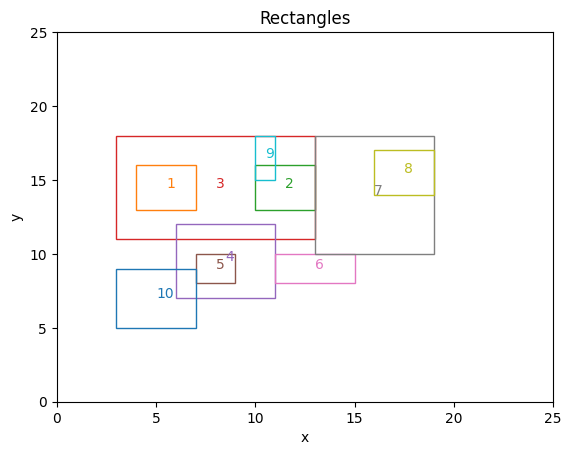

In [4]:
def plotRectangles(rectangles_df: pd.DataFrame, point: Optional[tuple[int,int]] = None)-> None:
    """
    Plot the rectangles and the point if provided

    Args:
    ----------
        rectangles_df (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

        point (Optional[tuple[int,int]], optional): the x and y coordinates of the point to be plotted. Defaults to None.
    """
    fig, ax = plt.subplots()
    for rectangle_id,rectangle in df.iterrows():
        x_min, y_min, x_max, y_max = rectangle
        # add a rectangle to the plot
        # edgecolor=f'C{rectangle_id}' is used to set the color of the rectangle to the color of the rectangle_id
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min,
                     y_max - y_min, fill=None, edgecolor=f'C{rectangle_id}')) 
        # add the id of the rectangle to the plot
        ax.annotate(rectangle_id, (x_min + (x_max - x_min) / 2,
                    y_min + (y_max - y_min) / 2), color=f'C{rectangle_id}')

    # set the limits of the axes
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 25)
    if point != None:
        ax.plot(point[0], point[1], marker="o", markersize=5,
                markeredgecolor="red", markerfacecolor="green")
    ax.set_title('Rectangles')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()


plotRectangles(df)


### Q1) Accept input {x, y} from the keyboard. Print if this point lies within any of the rectangles in the given test data set. If yes then list the rectangles enclosing the given point in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id}.

Eg: {1, 5, 8} implies that given point(x, y) is enclosed in the rectangles 1, 5 and 8.


In [5]:
def inRectangle(x_min: int, y_min: int, x_max: int, y_max: int, x: int, y: int) -> bool:
    """Check if a point is inside a rectangle

    Args:
    ----------
        x_min (int): x coordinate of the bottom left corner
        y_min (int): y coordinate of the bottom left corner
        x_max (int): x coordinate of the top right corner
        y_max (int): y coordinate of the top right corner
        x (int): x coordinate of the point
        y (int): y coordinate of the point

    Returns:
    ----------
        bool: True if the point is inside the rectangle, False otherwise
    """

    return x >= x_min and x <= x_max and y >= y_min and y <= y_max


In [6]:
def pointInRectangles(rectangles: pd.DataFrame, point: tuple[int, int]) -> Optional[pd.DataFrame]:
    """Find the rectangles that contain a point and return a dataframe with the rectangles

    Args:
    ----------
        df (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

        point (tuple[int, int]): the x and y coordinates of the point


    Returns:
        Optional[pd.DataFrame]: a dataframe of rectangles with that point contained in it with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

    """
    rect_list = []
    for rectangle_id,rectangle in rectangles.iterrows():
        x_min, y_min, x_max, y_max = rectangle
        # check if the point is inside the rectangle
        if inRectangle(x_min, y_min, x_max, y_max, point[0], point[1]):
            # add the rectangle to the list
            rect_list.append([rectangle_id, x_min, y_min, x_max, y_max])
    # if there are rectangles that contain the point return a dataframe with the rectangles
    
    if rect_list:
        # print(rect_list)
        df = pd.DataFrame(rect_list, columns=['rectangle_id', 'x_min', 'y_min', 'x_max', 'y_max']).set_index('rectangle_id',inplace=False)
        # print(df)
        return df


In [7]:
point = (10, 10)
pointInRectangles(df, point)

,x_min,y_min,x_max,y_max
rectangle_id,,,,
4,6,7,11,12


In [8]:
df

,x_min,y_min,x_max,y_max
rectangle_id,,,,
1,4,13,7,16
2,10,13,13,16
3,3,11,13,18
4,6,7,11,12
5,7,8,9,10
6,11,8,15,10
7,13,10,19,18
8,16,14,19,17
9,10,15,11,18


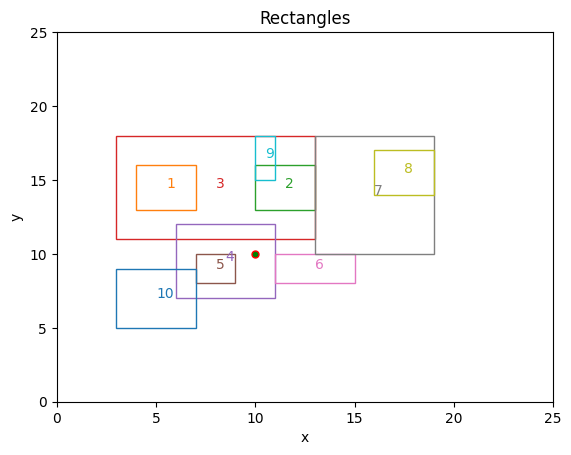

In [9]:
point = (10, 10)
plotRectangles(df, point)


### Q3) List of rectangles that overlap with other rectangles in the format {{rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, ..... {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}}

Eg: {{5, 7, 9, 12}, {6, 10, 12}} implies that rectangle 5 overlaps with rectangles 7, 9 and 12; rectangle 6 overlaps with rectangles 10 and 12.


In [10]:
def overlap(rect1:pd.Series, rect2:pd.Series)->bool:
    """Check if two rectangles overlap

    Args:
    ----------
        rect1 (pd.Series): rectangle 1
        rect2 (pd.Series): rectangle 2
        rect1 and rect2 have the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner


    Returns:
        bool: True if the rectangles overlap, False otherwise
    """
    x_min, y_min, x_max, y_max = rect1
    x_min2, y_min2, x_max2, y_max2 = rect2
    return x_max>x_min2 and x_min<x_max2 and y_max>y_min2 and y_min<y_max2


def overLappingRectangles(rectangles:pd.DataFrame)->defaultdict[List[int]]:
    """Find the overlapping rectangles and return a list of tuples with the pair ids of the overlapping rectangles

    Args:
    ----------
        rectangles (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

    Returns:
    ----------
        defaultdict[List[int]]: a dictionary with the rectangle ids as keys and a list of overlapping rectangles as values
        similar to an adjacency list in a graph
        if the rectangles 1 and 2 overlap, the dictionary will have the following key-value pairs:
            1: [2]
            2: [1]

    """
    overlap_dict = defaultdict(list[int])
    for i in range(rectangles.shape[0]):
        rect1 = rectangles.iloc[i, :]
        for j in range(i+1, rectangles.shape[0]):
            rect2 = rectangles.iloc[j, :]
            # print(i,j,rect1, rect2)# DEBUG
            if overlap(rect1, rect2):
                overlap_dict[rectangles.index[i]].append(rectangles.index[j])
                overlap_dict[rectangles.index[j]].append(rectangles.index[i])
    return overlap_dict


In [11]:
over_lapping_rectangles = overLappingRectangles(df)
over_lapping_rectangles

defaultdict(list[int],
            {'1': ['3'],
             '3': ['1', '2', '4', '9'],
             '2': ['3', '9'],
             '9': ['2', '3'],
             '4': ['3', '5', '10'],
             '5': ['4'],
             '10': ['4'],
             '7': ['8'],
             '8': ['7']})

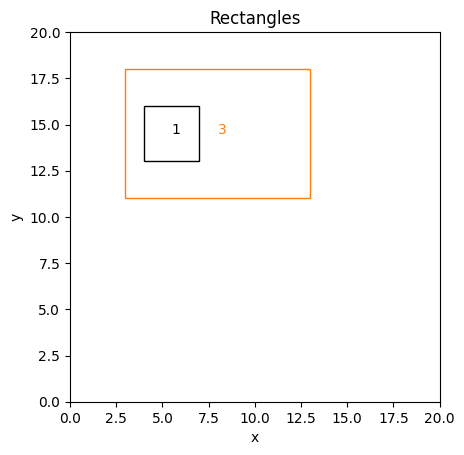

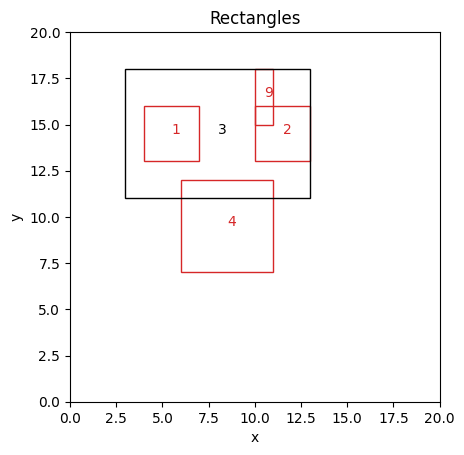

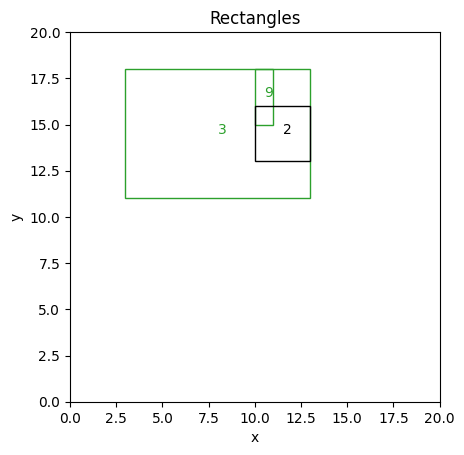

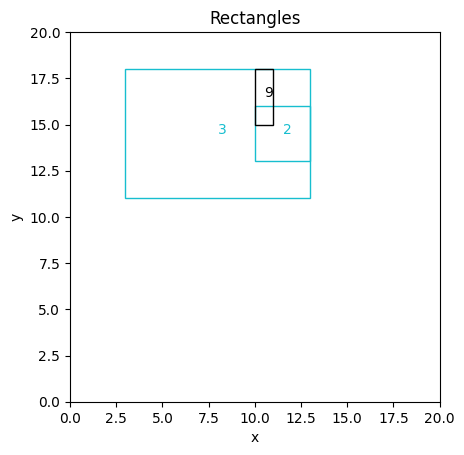

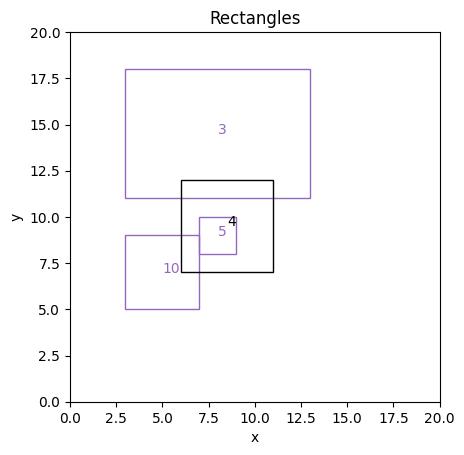

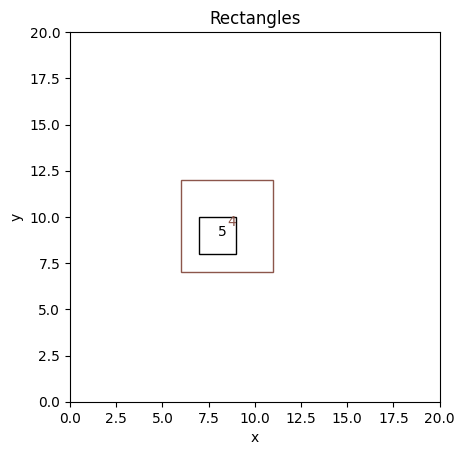

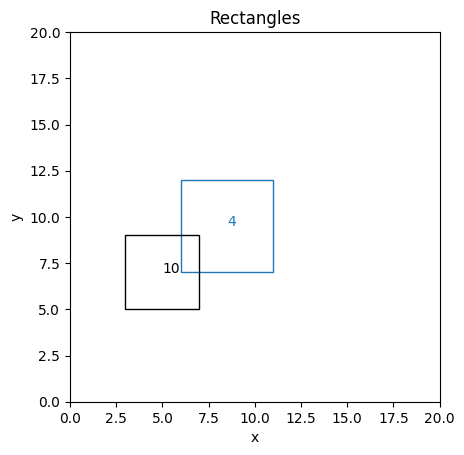

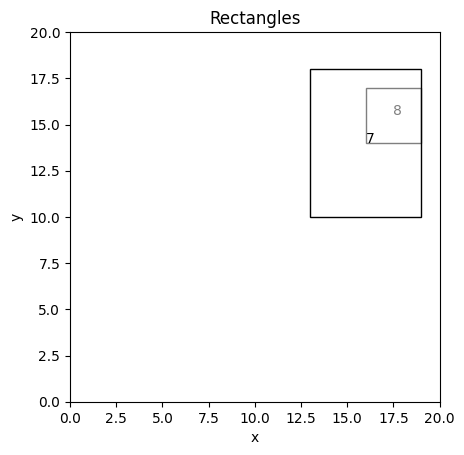

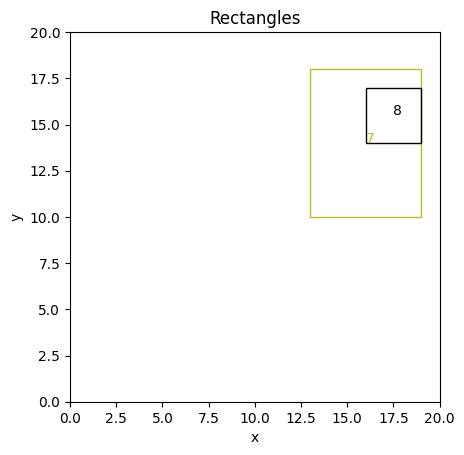

In [12]:
def plotOverlapRect(rectangles_df: pd.DataFrame, over_lap_rect_dict: defaultdict[List[int]]) -> None:

    def plotRect(ax, x_min: int, y_min: int, x_max: int, y_max: int, rectangle_id: int, color_id: int = None):

        color = f'C{color_id}' if color_id else 'black'
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min,
                                   y_max - y_min, fill=None, edgecolor=color))
        ax.annotate(rectangle_id, (x_min + (x_max - x_min) / 2,
                    y_min + (y_max - y_min) / 2), color=color)
    
    

    for over_lap_rect_id in over_lapping_rectangles:
        fig, ax = plt.subplots()
        for rectangle_id in over_lapping_rectangles[over_lap_rect_id]:
            rect = df.loc[rectangle_id]
            plotRect(ax, rect.x_min, rect.y_min, rect.x_max, rect.y_max, rectangle_id, over_lap_rect_id,)
        rect = df.loc[over_lap_rect_id]
        plotRect(ax, rect.x_min, rect.y_min, rect.x_max, rect.y_max, over_lap_rect_id)
        ax.set_xlim(0, 20)
        ax.set_ylim(0, 20)
        ax.set_aspect('equal')
        ax.set_title('Rectangles')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.show()

        plt.show()


plotOverlapRect(df, over_lapping_rectangles)


### Q2) List of rectangles that don't overlap any other rectangles. The output should be in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id}


In [13]:
def getUniOverlapRect(over_lap_rect_dict: defaultdict[List[int]])->set:
    unq_over_lap_rect = {over_lap_rect_id for over_lap_rect_id in over_lapping_rectangles}
    return unq_over_lap_rect
            

In [16]:
getUniOverlapRect(over_lapping_rectangles)

{'1', '10', '2', '3', '4', '5', '7', '8', '9'}

In [17]:
def getNonOverlapRect(rectangles_df: pd.DataFrame, over_lap_rect_dict: defaultdict[List[int]])->None:
    return set(df.index) - getUniOverlapRect(over_lapping_rectangles)

In [28]:
non_over_lapping_rectangles = getNonOverlapRect(df, over_lapping_rectangles)
non_over_lapping_rectangles

{'6'}

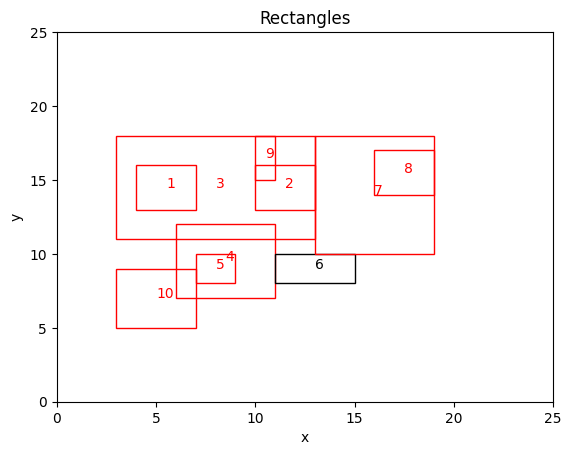

In [31]:
def plotNonOverlapRectangles(rectangles_df: pd.DataFrame, non_over_lapping_rectangles: set)-> None:
    """
    Plot the rectangles and the point if provided

    Args:
    ----------
        rectangles_df (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner
        
        non_over_lapping_rectangles (set): a set of the non overlapping rectangles


    """
    fig, ax = plt.subplots()
    for rectangle_id,rectangle in df.iterrows():
        x_min, y_min, x_max, y_max = rectangle
        # add a rectangle to the plot
        # edgecolor=f'C{rectangle_id}' is used to set the color of the rectangle to the color of the rectangle_id
        color = 'black' if rectangle_id in non_over_lapping_rectangles else 'red'
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min,
                     y_max - y_min, fill=None, edgecolor=color)) 
        # add the id of the rectangle to the plot
        ax.annotate(rectangle_id, (x_min + (x_max - x_min) / 2,
                    y_min + (y_max - y_min) / 2), color=color)

    # set the limits of the axes
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 25)
    ax.set_title('Rectangles')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()


plotNonOverlapRectangles(df,non_over_lapping_rectangles)

### Q4) List of rectangles that contain other rectangles in the format {rectangle_id, list_of_rectangle_ids_which_are_contained_in}
Eg: {{5, 2, 6}, {4, 3, 9}} implies that rectangle 5 contains rectangles 2 and 6; rectangle 4 contains rectangles 3 and 9.

In [22]:
def contain(rect_out:pd.Series, rect_in:pd.Series)->bool:
    """Check if the inner rectangle is contained in the outer rectangle

    Args:
        rect1 (pd.Series): outer rectangle 
        rect2 (pd.Series): inner rectangle

    Returns:
        bool: True if the inner rectangle is contained in the outer rectangle, False otherwise
    """
    x_min, y_min, x_max, y_max = rect_out
    x_min2, y_min2, x_max2, y_max2 = rect_in
    return x_max2 <= x_max and x_min2 >= x_min and y_max2 <= y_max and y_min2 >= y_min

In [25]:
def containedRect(rectangles: pd.DataFrame) -> defaultdict[List[int]]:
    """
    Find the rectangles that are contained in other rectangles and return dictionary with the rectangle ids as keys and a list of rectangles that contain them as values

    Args:
    ----------
        rectangles (pd.DataFrame): a dataframe with the following columns:
            rectangle_id: the id of the rectangle
            x_min: the x coordinate of the top left corner
            y_min: the y coordinate of the top left corner
            x_max: the x coordinate of the bottom right corner
            y_max: the y coordinate of the bottom right corner

    Returns:
    ----------
        defaultdict[List[int]]: a dictionary with the rectangle ids as keys and a list of overlapping rectangles as values
        if the rectangles 1 and 2 overlap, the dictionary will have the following key-value pairs:
            1: [2]

    """
    contained_dict = defaultdict(list[int])
    for i in range(rectangles.shape[0]):
        rect_out = rectangles.iloc[i, :]
        for j in range(rectangles.shape[0]):
            rect_in = rectangles.iloc[j, :]
            if i != j and contain(rect_out, rect_in):
                contained_dict[rectangles.index[i]].append(rectangles.index[j])
    return contained_dict


In [33]:
contained_rect_dict = containedRect(df)
contained_rect_dict

defaultdict(list[int], {'3': ['1', '2', '9'], '4': ['5'], '7': ['8']})

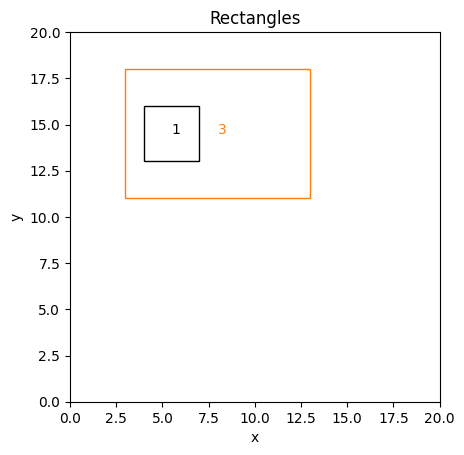

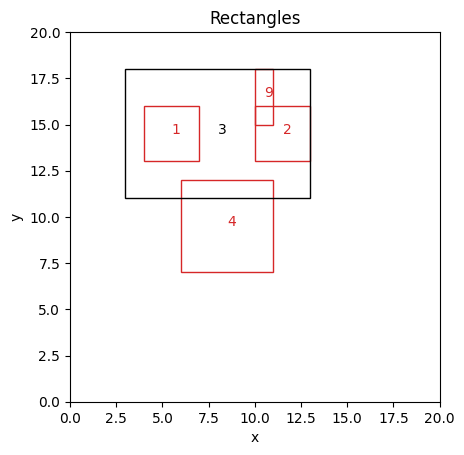

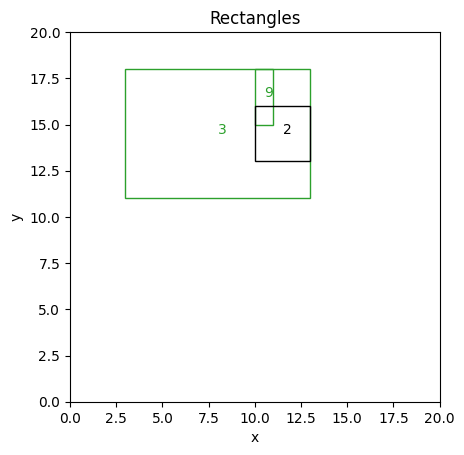

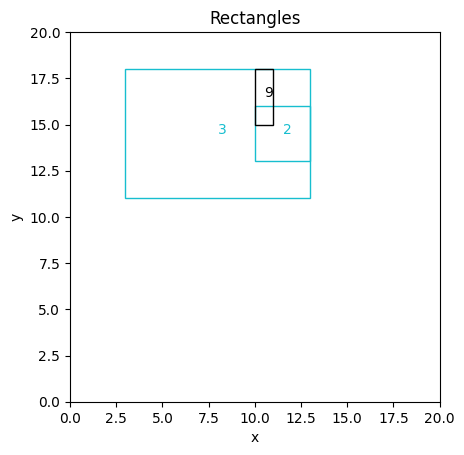

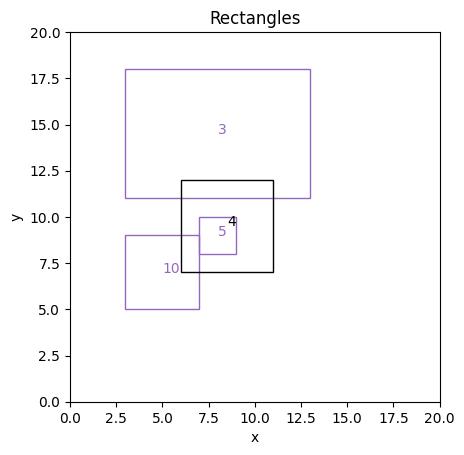

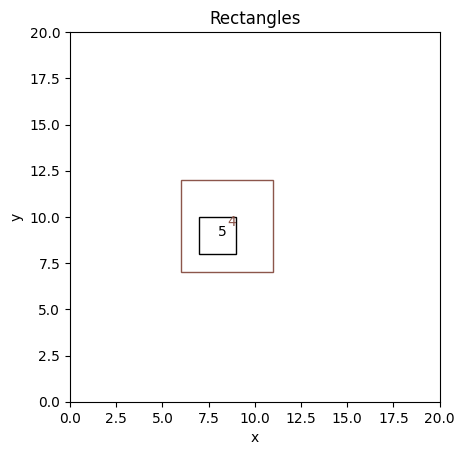

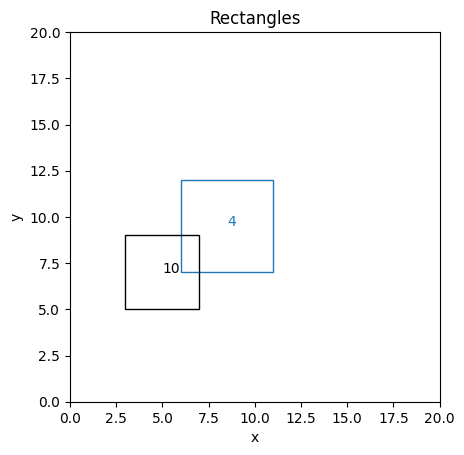

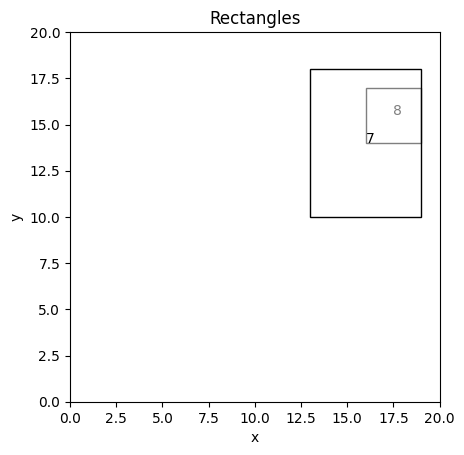

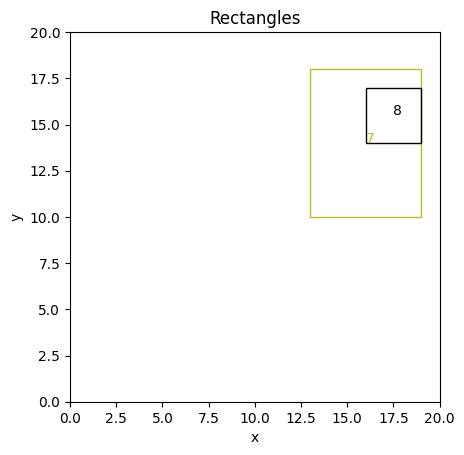

In [34]:
def plotOverlapRect(rectangles_df: pd.DataFrame, contained_rect_dict: defaultdict[List[int]]) -> None:

    def plotRect(ax, x_min: int, y_min: int, x_max: int, y_max: int, rectangle_id: int, color_id: int = None):

        color = f'C{color_id}' if color_id else 'black'
        ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min,
                                   y_max - y_min, fill=None, edgecolor=color))
        ax.annotate(rectangle_id, (x_min + (x_max - x_min) / 2,
                    y_min + (y_max - y_min) / 2), color=color)
    
    

    for contained_rect_id in over_lapping_rectangles:
        fig, ax = plt.subplots()
        for rectangle_id in over_lapping_rectangles[contained_rect_id]:
            rect = df.loc[rectangle_id]
            plotRect(ax, rect.x_min, rect.y_min, rect.x_max, rect.y_max, rectangle_id, contained_rect_id,)
        rect = df.loc[contained_rect_id]
        plotRect(ax, rect.x_min, rect.y_min, rect.x_max, rect.y_max, contained_rect_id)
        ax.set_xlim(0, 20)
        ax.set_ylim(0, 20)
        ax.set_aspect('equal')
        ax.set_title('Rectangles')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        plt.show()

        plt.show()


plotOverlapRect(df, contained_rect_dict)

### Q5) List the rectangles that are abutting each other in the following format {rectangle_id, which side_(e, w, n, s), rectangle_id_of_abutting_rectangle_id}
Eg: {{5, n, 7}, {4, e, 3}} implies that rectangle 5 has rectangle 7 abutting it on the northern side, rectangle 4 has rectangle 3 abutting it on the eastern side.

In [ ]:
#5th qn
def abutt(rect1, rect2):
    id_1,x_min, y_min, x_max, y_max = rect1 #first rectangle
    id_2,x_min2, y_min2, x_max2, y_max2 = rect2 #second rectangle
    # print(x_min, y_min, x_max, y_max, x_min2, y_min2, x_max2, y_max2)

    ''' If 2 rectangles are abutting, it means that they have a common x coordinate or a common y coordinate. If they have a common x coordinate, 
    the intersection of the vertical ranges (y_min,y_max) of both rectangles should not be null. Similarly. If they have a common y coordinate, 
    the intersection of horizontal ranges (x_min,x_max) of both rectangles should have some common points.'''

    s1=range(y_min2,y_max2) # set of points on the width of the second rectangle
    s2=range(y_min,y_max) # set of points on the width of the first rectangle
    s3=range(x_min,x_max) # set of points on the length of the second rectangle
    s4=range(x_min2,x_max2) # set of points on the length of the first rectangle

    p1=0
    # if the widths of both the rectangles have common points, then variable 'p1' is set to 1.
    if len(list(set(s1) & set(s2)))>0:
        p1=1 
    q1=0
    # if the lengths of both the rectangles have common points, then variable 'q1' is set to 1.
    if len(list(set(s3) & set(s4)))>0:
        q1=1

    # checking if the x coordinates are equal on the left side of the first rectangle (x_min),
    # the rectangles shouldn't overlap and widths of the rectangles should have common points.
    if ((x_min==x_min2) and p1==1 and overlap(rect1,rect2)==0) or ((x_min==x_max2) and p1==1 and overlap(rect1,rect2)==0):
        dirn='w'
    elif ((x_max==x_max2) and p1==1 and overlap(rect1,rect2)==0) or ((x_max==x_min2) and p1==1 and overlap(rect1,rect2)==0):
        dirn='e' # right side of first rectangle

    # checking if the y coordinates are equal on the top side of the first rectangle (y_min),
    # the rectangles shouldn't overlap and lengths of the rectangles should have common points.
    elif ((y_max==y_max2) and q1==1 and overlap(rect1,rect2)==0) or ((y_max==y_min2) and q1==1 and overlap(rect1,rect2)==0):
        dirn='n'
    elif ((y_min==y_min2) and q1==1 and overlap(rect1,rect2)==0) or ((y_min==y_max2) and q1==1 and overlap(rect1,rect2)==0):
        dirn='s' # bottom side of the first rectangle
    else:
        dirn='no dir'
    return dirn

In [ ]:
abutted_rects=[]
# comparing each rectangle with every other rectangle to check if they abutt
for i in df["rectangle_id"]:
    i=int(i)
    #creating a list for each rectangle
    p=[]
    p.append(i)
    rect1=i,df["x_min"][i-1],df["y_min"][i-1],df["x_max"][i-1],df["y_max"][i-1]
    #print(rect1)
    for j in df["rectangle_id"]:
        j=int(j)
        if(i!=j): # doesn't compare it with itself
            rect2=j,df["x_min"][j-1],df["y_min"][j-1],df["x_max"][j-1],df["y_max"][j-1]
            #print(rect2)
            # append the direction and second rectangle id to the list if the function return a direction
            if abutt(rect1,rect2)!='no dir':
                dirn=abutt(rect1,rect2)
                p.append(dirn)
                p.append(rect2[0])
    abutted_rects.append(p) # appending the list to the final list
#print(abutted_rects)


# removing rectangles which do not abutt with any other rectangles
abutted_rects_fin=[]
for i in abutted_rects:
    if len(i)>1: 
        abutted_rects_fin.append(i)
print(abutted_rects_fin)

[[2, 'e', 7], [3, 'e', 7], [4, 'e', 6], [5, 'w', 10], [6, 'w', 4, 'n', 7], [7, 'w', 2, 'w', 3, 's', 6], [10, 'e', 5]]
